In [30]:
import phoebe 
from phoebe import u, c

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time


In [31]:
b = phoebe.default_binary()

# Dataset

In [16]:
j0822 = fits.open('/home/karanbt/Phoebe-Tutorials/j0822p30.fits')

j0822_hdr = j0822[0].header
j0822_data = j0822[0].data

In [17]:
j0822.info()

Filename: /home/karanbt/Phoebe-Tutorials/j0822p30.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (2533,)   float32   


In [18]:
j0822_hdr

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 2533 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2017-04-11T22:02:55' / Date FITS file was generated                  
IRAF-TLM= '2017-04-11T22:02:55' / Time of last modification                     
OBJECT  = 'j0822p30'           / Name of the object observed                    
OBSERVAT= 'MMTO              '  /  observatory                                  
OBSERVER= 'WBrown            '  /  observers                                    
EXPTIME =               10680. /  actual integration time                       
DARKTIME=                 96

above data seems to be missing observed times and radial velocities

In [32]:
start_time = Time('2016-02-12 05:16:50', scale='utc') 
time = [start_time.jd]
wavelengths = phoebe.linspace(3600, 4500, 2533)
flux_densities = j0822_data 

b.add_dataset('lp', 
              times = time,
              wavelengths = wavelengths * 0.1, 
              flux_densities = flux_densities * 0.01)

<ParameterSet: 76 parameters | contexts: constraint, figure, dataset, compute>

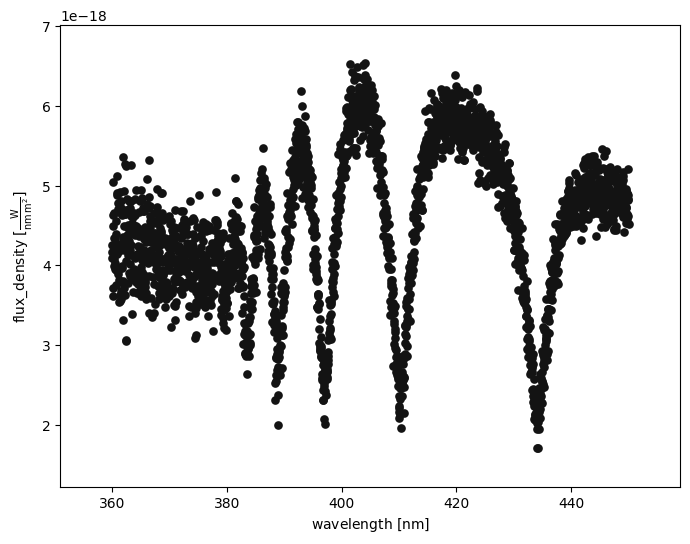

In [33]:
_ = b.plot(show = True, marker = '.')

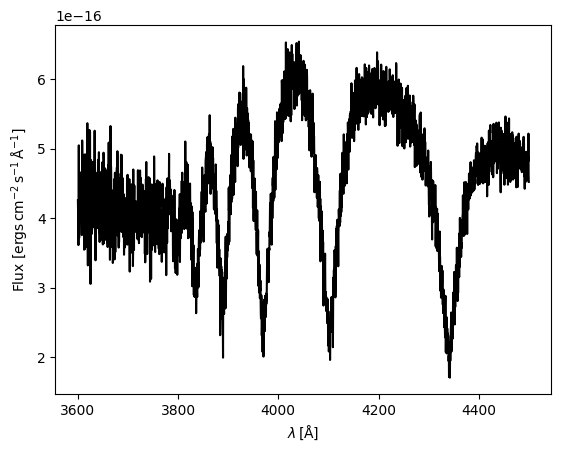

In [27]:
plt.plot(wavelengths, j0822_data, color = 'black')
plt.xlabel(r'$\lambda \, [\text{Å}]$')
plt.ylabel(r'Flux $[\text{ergs} \, \text{cm}^{-2} \, \text{s}^{-1} \, \text{Å}^{-1}]$')
plt.show()